In [1]:
import requests

# url = "https://pickandroll.com.au/p/ncaa-women-division-i-202021?fbclid=IwAR2obmfsuL6X2-lSQqm2jEvx8qh2CRxO3hdk7yFfVXDNvZHBq0O16Fqh4vI"

url = "https://pickandroll.com.au/p/ncaa-men-division-i-202021-season"

page = requests.get(url)

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, 'html.parser')



In [4]:
# candidates = soup.select("article div p")
candidates = soup.find_all("div", { "class" : "captioned-image-container" })
# //*[@id="main"]/div[2]/div/div[1]/div/article/div[3]/p[4]
# //*[@id="main"]/div[2]/div/div[1]/div/article/div[3]/div[1]
# //*[@id="main"]/div[2]/div/div[1]/div/article/div[3]/div[3]

In [5]:
data = []
counter = 0
for html in candidates:
    counter += 1
    for sibling in html.next_siblings:
        #stop when you reach the next tag
        if(sibling.name == "div"):
            break;
        content = sibling.get_text().replace(" / "," | ")
        elements = content.split(" | ")
        if len(elements) == 5:
            content = content + " | " + str(counter)
            data.append(content)

In [6]:
import pandas as pd

cols = ['player','state','position','institution','conference','year']

df = pd.DataFrame(data)

In [7]:
def split_more(x):
    return pd.Series( x.split('|') )

df[ cols ] = df[0].apply(split_more)

In [8]:
df['year'] = df['year'].astype('int64')
df['year'] = max(df['year']) - df['year'] + 1

df['state'] = df['state'].astype('category')
 

In [9]:
df['class'] = df['year'].map({1:'Freshman',2:'Sophomore',3:'Junior',4:'Senior'})

In [10]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

c = ['darkslateblue','steelblue','deepskyblue','aqua']

NA = mpatches.Patch(color=c[0], label='Freshman')
EU = mpatches.Patch(color=c[1], label='Sophomore')
AP = mpatches.Patch(color=c[2], label='Junior')
SA = mpatches.Patch(color=c[3], label='Senior')
# plt.legend(handles=[NA,EU,AP,SA], loc=2)

In [11]:
df2 = df.groupby(['state', 'class'])['state'].count().unstack('class').fillna(0)
total = df2.sum(axis=1)
df2 = df2.assign(total=total).sort_values('total').drop('total',axis=1)

<Figure size 540x324 with 0 Axes>

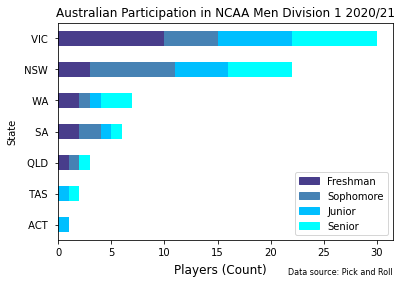

<Figure size 540x324 with 0 Axes>

In [12]:
p = df2.plot(kind='barh',
    stacked=True,
    title="Australian Participation in NCAA Men Division 1 2020/21",
    xlabel="State",
    ylabel="Players (Count)",
    color=c).legend(handles=[NA,EU,AP,SA], loc=4).get_figure()

txt="Data source: Pick and Roll"
plt.figtext(0.9, 0.005, txt, wrap=True, horizontalalignment='right', fontsize=8)

txt="Players (Count)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.figure(figsize=(7.5,4.5))

In [13]:
p.savefig('ncaa1_men_2021.png')

In [28]:
df.groupby(['institution']).count()

,0,player,state,position,conference,year
institution,,,,,,
American,1,1,1,1,1,1
Arizona,1,1,1,1,1,1
Arizona State,1,1,1,1,1,1
Austin Peay,2,2,2,2,2,2
Bowling Green,1,1,1,1,1,1
...,...,...,...,...,...,...
Washington State,2,2,2,2,2,2
Weber State,1,1,1,1,1,1
William & Mary,1,1,1,1,1,1


In [29]:
df.groupby(['position']).count()

,0,player,state,institution,conference,year
position,,,,,,
\tGuard,1,1,1,1,1,1
Centre,4,4,4,4,4,4
Forward,45,45,45,45,45,45
Guard,71,71,71,71,71,71


In [30]:
df.groupby(['conference']).count()

,0,player,state,position,institution,year
conference,,,,,,
America East,1,1,1,1,1,1
American Athletic,1,1,1,1,1,1
Atlantic 10,7,7,7,7,7,7
Atlantic Coast,6,6,6,6,6,6
Atlantic Sun,2,2,2,2,2,2
Big 10,4,4,4,4,4,4
Big 12,3,3,3,3,3,3
Big Sky,8,8,8,8,8,8
Big West,8,8,8,8,8,8
